In [1]:
from core import *
import requests, json

In [2]:
dataset_id = {
    'all': 'd_dc5c121312d86a6e3dfbe8cc2d609d57', 
}
dataset_mode = 'all'

In [3]:
response = requests.get(
    'https://data.gov.sg/api/action/datastore_search', 
    params={
        'resource_id': dataset_id[dataset_mode],
        'limit': 999
    }
)
print(json.dumps(response.json(), indent=2))

{
  "help": "https://data.gov.sg/api/3/action/help_show?name=datastore_search",
  "success": true,
  "result": {
    "resource_id": "d_dc5c121312d86a6e3dfbe8cc2d609d57",
    "fields": [
      {
        "type": "text",
        "id": "DataSeries"
      },
      {
        "type": "numeric",
        "id": "2023"
      },
      {
        "type": "numeric",
        "id": "2022"
      },
      {
        "type": "numeric",
        "id": "2021"
      },
      {
        "type": "numeric",
        "id": "2020"
      },
      {
        "type": "numeric",
        "id": "2019"
      },
      {
        "type": "numeric",
        "id": "2018"
      },
      {
        "type": "numeric",
        "id": "2017"
      },
      {
        "type": "numeric",
        "id": "2016"
      },
      {
        "type": "numeric",
        "id": "2015"
      },
      {
        "type": "numeric",
        "id": "2014"
      },
      {
        "type": "numeric",
        "id": "2013"
      },
      {
        "type": "numeri

In [4]:
data = response.json()
records = data['result']['records']
df = pd.DataFrame(records)
df['DataSeries'] = df['DataSeries'].str.strip()
df['SubDataSeries'] = df['DataSeries'].where(df['DataSeries'].str.startswith(('Total', 'Male', 'Female', ))).ffill()
df['DataSeries'] = df['DataSeries'].where(~df['DataSeries'].str.startswith(('Total', 'Male', 'Female', ))).fillna('Total')
df['SubSubDataSeries'] = df['SubDataSeries'].str.extract(r'(?i)\b(male|female)s?\b')
df['SubDataSeries'] = df['SubDataSeries'].str.extract(r'(?i)\b(under.*|\d+.*|total)\b')
df['SubDataSeries'] = df['SubDataSeries'].str.replace(r'(?i)\W*\bduration.*marriage\b|\W*\byears?\b', '', regex=True).str.strip()
df['DataSeries'] = df['DataSeries'].str.replace(r'(?i)\W*\baged?\b', '', regex=True).str.strip()
df = df.rename(columns={'DataSeries': 'age_group', 'SubDataSeries': 'duration_marriage', 'SubSubDataSeries': 'gender'}).drop(columns=['_id'])
df['age_group'] = df['age_group'].replace({'40-44': '40+', '45-49': '40+', '50-54': '40+', '55-59': '40+', '60 & Over': '40+', })
df['age_group'] = pd.Categorical(df['age_group'], ['Unknown', 'Under 20', '20-24', 'Under 25', '25-29', '30-34', '35-39', '40+', 'Total'], ordered=True)
df['duration_marriage'] = pd.Categorical(df['duration_marriage'], ['Under 5', '5-9', '10-14', '15-19', '20-24', '25-29', '30 & Over', 'Total'], ordered=True)
df['gender'] = pd.Categorical(df['gender'], ['Female', 'Male', 'Total'], ordered=False)
for col in df.drop(columns=['gender', 'age_group', 'duration_marriage']).columns:
    try:
        df[col] = df[col].astype('int')
    except:
        df[col] = df[col].str.strip().astype('int')
df = df.groupby(by=['gender', 'age_group', 'duration_marriage'], observed=True).sum()
df = df.rename(columns=int).astype('int').transpose().sort_index(axis=0).sort_index(axis=1).copy(deep=True)
# df = df.set_index(keys=['brides', 'grooms', 'comparison']).rename(columns=int).astype('int').transpose().sort_index(axis=0).sort_index(axis=1).copy(deep=True)
# df = df.set_index(keys=['brides', 'grooms']).rename(columns=int).astype('int').unstack(level=0).sort_index(axis=0).sort_index(axis=1).copy(deep=True)
assert isinstance(df, pd.DataFrame)
display_all_columns(df)

gender             Female                                              \
age_group         Unknown                                               
duration_marriage Under 5 5-9 10-14 15-19 20-24 25-29 30 & Over Total   
1980                    1   3    14    29    43    21        18   129   
1981                    0   4    13    41    49    24        26   157   
1982                    2   3     5    13    27    19        31   100   
1983                    0   4     2    13    34    20        21    94   
1984                    1   4     1    10    30    29        24    99   
1985                    3   1     3     4    19    18        22    70   
1986                   17   5     6     1    17    17        20    83   
1987                    5   2     1     2    18    18        35    81   
1988                    0   4     4     3     7    17        31    66   
1989                    2   8     3     4     5    21        29    72   
1990                    2   3     5     4     8    11        32    65   
1991                    1   6     5     4     6    15        39    76   
1992                    1   7     8     5     4     7        41    73   
1993                    1   5     3     3     3     6        25    46   
1994                    3   7     9     6     2     4        26    57   
1995                    6  17    14    15     7     8        60   127   
1996                    5  18    17    16     9     9        55   129   
1997                    5  29    26    14    12     3        78   167   
1998                   10  53    22    16    11     8        51   171   
1999                   21  52    34    27    16     9        47   206   
2000                   19  51    36    23    14    11        60   214   
2001                    3  51    36    26    18     9        30   173   
2002                   28  88    42    36    26    12        47   279   
2003                   15  62    55    28    23    13        28   224   
2004                   57  95    57    10    15    11        23   268   
2005                    0  14     9     6     0     1         2    32   
2006                    0   4     2     4     1     0         2    13   
2007                    0   2     2     0     1     2         0     7   
2008                    0   0     1     6     6     5         3    21   
2009                    0   0     2     2     3     2         3    12   
2010                    1   0     1     1     1     2         6    12   
2011                    0   0     0     0     0     0         1     1   
2012                    0   0     1     0     1     1         5     8   
2013                    0   0     0     1     0     0         0     1   
2014                    2   1     1     3     4     4        28    43   
2015                    0   2     2     0     0     0        11    15   
2016                    1   0     0     1     0     0         5     7   
2017                    0   0     2     3     1     2         4    12   
2018                    0   3     0     2     0     1         9    15   
2019                    0   1     0     0     0     0        11    12   
2020                    1   0     1     1     0     0         5     8   
2021                    0   0     1     0     1     0        11    13   
2022                    1   0     1     0     1     0         7    10   
2023                    0   0     1     0     0     0         7     8   

gender                                                                  \
age_group         Under 25                                               
duration_marriage  Under 5 5-9 10-14 15-19 20-24 25-29 30 & Over Total   
1980                    24  49     0     0     0     0         0    73   
1981                    34  42     0     0     0     0         0    76   
1982                    45  40     0     0     0     0         0    85   
1983                    32  57     0     0     0     0         0    89   
1984                    29  37     0     0     0  

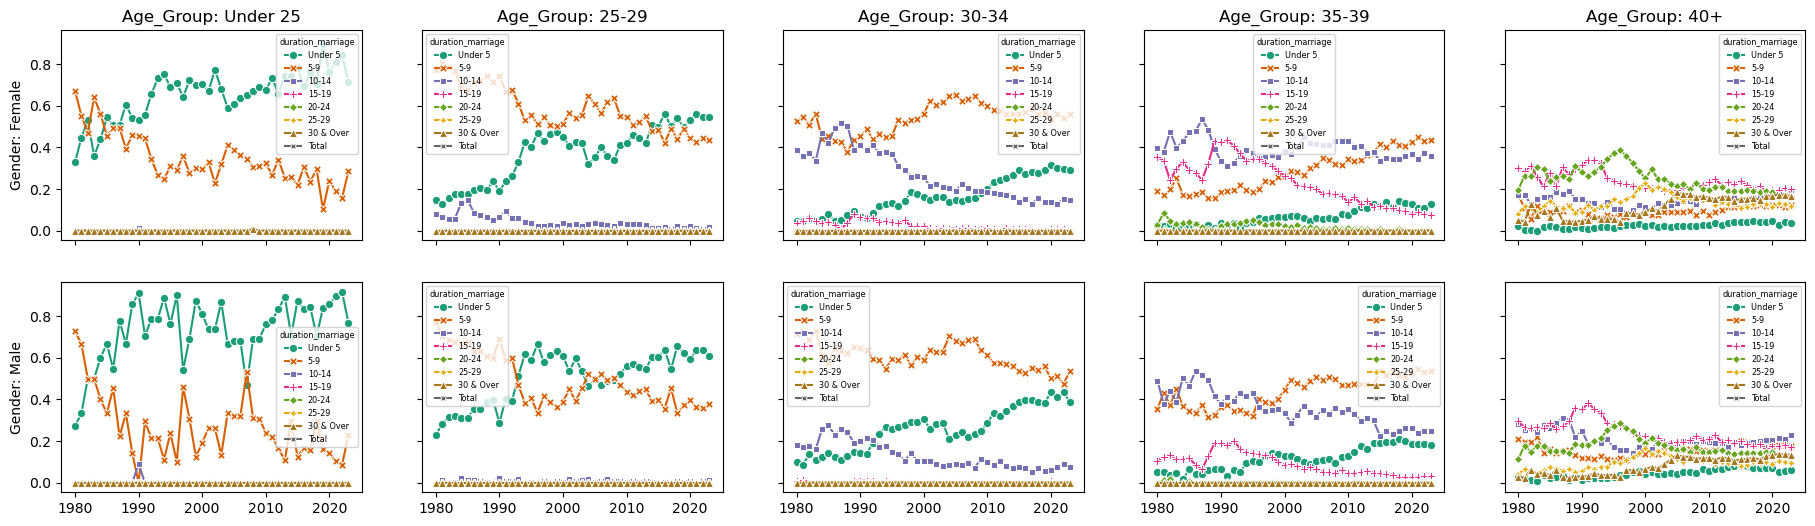

In [5]:
df_pct = df.apply(lambda row: row.div(row.xs('Total', 0, 'duration_marriage')), axis=1).drop(columns=['Total'], level='duration_marriage').sort_index(axis=1).copy(deep=True)
df_pct = df_pct.drop(columns=['Unknown', 'Total'], level='age_group').sort_index(axis=1).copy(deep=True)
fig, axs = plot_multicol_data(df_pct, x_level='gender', y_level='age_group')
fig.savefig(f'./duration_{dataset_mode}.svg', transparent=False, format='svg', bbox_inches='tight')
plt.show()
fig.clf()
plt.close()